# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTest.cfg'
data_path = './results/GoCFanIn'
simulation_name = 'MFGoC2000AT'
simulation_time =3000.0
analysis_time = 300.0
analysis_step = 100.0
run_the_simulation = False
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neurons to register activity
simulation.config_options['mflayer']['register_activity'] = True
simulation.config_options['goclayer']['register_activity'] = True
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIFwAT'
simulation.config_options['goclayer']['tau_th'] = 1.0e4
simulation.config_options['goclayer']['th_cons'] = 2.0e1
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-11
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 8.96627408e-01
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 1.15612198e-09

Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['layer'] = 'goclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 500

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-09-10 11:16:38,524 - P32443 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 3000.0s
2018-09-10 11:16:38,548 - P32443 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-09-10 11:16:38,660 - P32443 - MemTotal:85M - Simulation - DEBUG: Initializing cerebellum generator
2018-09-10 11:16:38,662 - P32443 - MemTotal:85M - Simulation - DEBUG: Cerebellar simulation initialized
2018-09-10 11:16:38,724 - P32443 - MemTotal:92M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2018-09-10 11:16:38,726 - P32443 - MemTotal:92M - Simulation - WARNING: Non-specified cell model parameter: tau_istdp in layer mflayer. Using default value
2018-09-10 11:16:38,728 - P32443 - MemTotal:92M - Simulation - WARNING: Non-specified number of neurons in layer mflayer
2018-09-10 11:16:38,731 - P32443 - MemTotal:92M - Simulation - WARNING: Non-specified cell model parameter: tau_istdp in layer goclayer. Using default value

Define a function to obtain the average firing rate

In [7]:
def obtain_fr(init_time,end_time):
    min_neuron = 0
    max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
    import numpy
    firing_frequency = float(len(gcell_id)) / ((end_time-init_time)*max_neuron)
    return firing_frequency

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


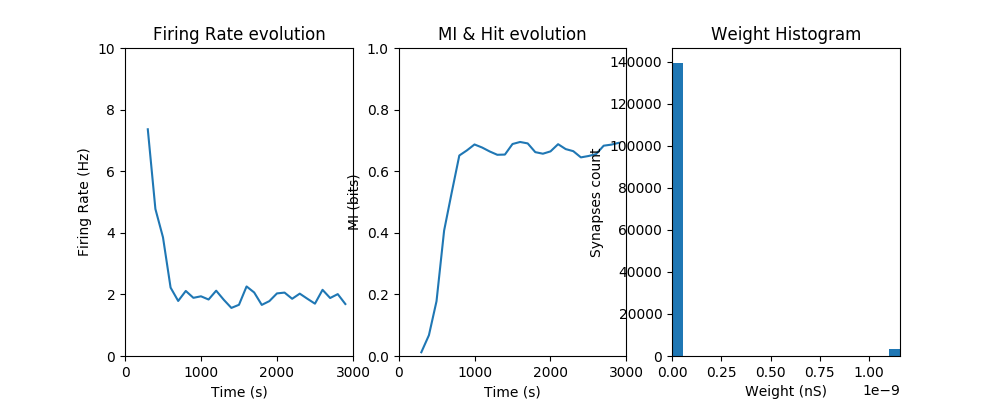

2018-09-10 11:17:17,279 - P32443 - MemTotal:2178M - Simulation - INFO: Running the simulation from 0.0s until time 300.0s
2018-09-10 11:17:17,280 - P32443 - MemTotal:2179M - Simulation - DEBUG: Running the simulation 300.0s until 300.0s
2018-09-10 11:17:17,285 - P32443 - MemTotal:2179M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-09-10 11:17:17,303 - P32443 - MemTotal:2179M - Simulation - INFO: Analyzing mutual information from time 0.0 to 300.0 seconds
2018-09-10 11:17:17,314 - P32443 - MemTotal:2179M - Simulation - INFO: Average firing rate in MI analysis: 7.87587962962963Hz
2018-09-10 11:17:17,510 - P32443 - MemTotal:2179M - Simulation - INFO: Individual pattern hit matrix:
2018-09-10 11:17:17,512 - P32443 - MemTotal:2179M - Simulation - INFO: [[1.         0.99823322 0.99646643 1.         1.         1.
  0.99116608 0.99823322 1.         0.98939929 0.99116608 0.99823322
  0.99646643 0.99823322 0.99469965 0.98763251 0.99646

2018-09-10 11:17:18,977 - P32443 - MemTotal:2179M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-09-10 11:17:18,979 - P32443 - MemTotal:2179M - Simulation - INFO: [[0.09695291 0.11301939 0.23545706 0.28088643 0.09750693 0.22437673
  0.39556787 0.23545706 0.20941828 0.39501385 0.39833795 0.10581717
  0.2199446  0.20775623 0.30138504 0.39113573 0.12963989 0.09916898
  0.06980609 0.07534626 0.10249307 0.21717452 0.12576177 0.10360111
  0.31966759 0.06537396 0.2398892  0.10692521 0.38947368 0.38836565
  0.39833795 0.22548476 0.22493075 0.10138504 0.22936288 0.07036011
  0.15900277 0.10803324 0.39833795 0.2099723  0.12520776 0.10193906
  0.40609418 0.40886427 0.41440443 0.40166205 0.08421053 0.07867036
  0.10193906 0.20609418 0.1933518  0.20166205 0.22936288 0.12797784
  0.38947368 0.06980609 0.12132964 0.39113573 0.4033241  0.21717452
  0.39058172 0.40221607 0.08199446 0.07534626 0.21108033 0.12022161
  0.22049861 0.09030471 0.12853186 0.24265928 0.3800554  0.118559

2018-09-10 11:17:20,399 - P32443 - MemTotal:2202M - Simulation - INFO: Individual pattern false alarm matrix:
2018-09-10 11:17:20,401 - P32443 - MemTotal:2202M - Simulation - INFO: [[0.71306332 0.70849971 0.44381061 0.3918996  0.86765545 0.45179692
  0.27381631 0.44152881 0.46719909 0.27666857 0.27324586 0.86138049
  0.45350827 0.46891044 0.37136338 0.28123217 0.81916714 0.72447233
  0.90131204 0.75470622 0.85966914 0.45636052 0.83057616 0.83628066
  0.3513976  0.87792356 0.43639475 0.85396463 0.28294353 0.28180262
  0.27267541 0.44723331 0.45065602 0.73074729 0.44438106 0.89047347
  0.52310325 0.84997148 0.27267541 0.46491728 0.77124929 0.82030804
  0.26754136 0.25955505 0.25556189 0.26697091 0.78436965 0.89275528
  0.74044495 0.47176269 0.48317171 0.47575585 0.44609241 0.81289218
  0.28123217 0.90473474 0.70507701 0.28009127 0.26697091 0.45693098
  0.28066172 0.26925271 0.88533942 0.89275528 0.46548774 0.73245864
  0.45464917 0.85111238 0.84826013 0.43525385 0.29035938 0.72047918]]
2

2018-09-10 11:17:21,810 - P32443 - MemTotal:2230M - Simulation - DEBUG: Joint shannon entropy: [[1.66418249 1.63437309 1.38352177 1.23157253 1.62200038 1.35857962
  1.09207588 1.36798035 1.39202208 1.09153642 1.09427885 1.63004308
  1.37533093 1.40434092 1.21892785 1.12418507 1.63341761 1.63946789
  1.6255379  1.64980917 1.63558193 1.391387   1.63861221 1.63892182
  1.1558901  1.63062951 1.36712952 1.63991738 1.09372537 1.09521615
  1.09014875 1.36686595 1.37966693 1.646165   1.36533554 1.62404908
  1.4875463  1.64334143 1.09291306 1.38671403 1.62948055 1.64454379
  1.09652989 1.13128113 1.09389229 1.0961096  1.65526388 1.62532948
  1.64194106 1.40737184 1.41225685 1.41083656 1.36717883 1.63241093
  1.10225391 1.59845695 1.63398511 1.09510202 1.09429791 1.40568547
  1.09291306 1.10117751 1.62904683 1.61888092 1.38679765 1.64441399
  1.38994044 1.36908499 1.40301134 1.37289132 1.09510202 1.64259534]]
2018-09-10 11:17:21,813 - P32443 - MemTotal:2230M - Simulation - DEBUG: Average MI of i

2018-09-10 11:17:23,298 - P32443 - MemTotal:2236M - Simulation - INFO: Theoretical maximum of MI
2018-09-10 11:17:23,299 - P32443 - MemTotal:2236M - Simulation - INFO: [0.80257948]
2018-09-10 11:17:24,550 - P32443 - MemTotal:2241M - Simulation - INFO: Running the simulation from 700.0s until time 800.0s
2018-09-10 11:17:24,552 - P32443 - MemTotal:2241M - Simulation - DEBUG: Running the simulation 100.0s until 800.0s
2018-09-10 11:17:24,558 - P32443 - MemTotal:2241M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-09-10 11:17:24,607 - P32443 - MemTotal:2241M - Simulation - INFO: Analyzing mutual information from time 500.0 to 800.0 seconds
2018-09-10 11:17:24,614 - P32443 - MemTotal:2241M - Simulation - INFO: Average firing rate in MI analysis: 2.039814814814815Hz
2018-09-10 11:17:24,700 - P32443 - MemTotal:2241M - Simulation - INFO: Individual pattern hit matrix:
2018-09-10 11:17:24,702 - P32443 - MemTotal:2241M - Simulation - I

2018-09-10 11:17:26,095 - P32443 - MemTotal:2247M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-09-10 11:17:26,096 - P32443 - MemTotal:2247M - Simulation - INFO: [[0.97440087 0.97167756 0.97058824 0.9711329  0.97276688 0.97167756
  0.96949891 0.9711329  0.96840959 0.96949891 0.96949891 0.97222222
  0.97167756 0.97004357 0.96786492 0.97058824 0.97222222 0.97167756
  0.97331155 0.9711329  0.97276688 0.97167756 0.97222222 0.97222222
  0.96949891 0.97385621 0.97167756 0.97494553 0.96786492 0.9711329
  0.96350763 0.97222222 0.97058824 0.97276688 0.9711329  0.97222222
  0.97167756 0.9754902  0.97004357 0.97222222 0.97167756 0.97331155
  0.96840959 0.97004357 0.97058824 0.9711329  0.97331155 0.97276688
  0.97167756 0.9711329  0.97167756 0.97167756 0.97167756 0.97167756
  0.96568627 0.97657952 0.97222222 0.9667756  0.97004357 0.97276688
  0.96840959 0.97222222 0.97494553 0.97276688 0.97167756 0.97167756
  0.97167756 0.64270153 0.64488017 0.9711329  0.96786492 0.9722222

2018-09-10 11:17:27,448 - P32443 - MemTotal:2252M - Simulation - INFO: Individual pattern false alarm matrix:
2018-09-10 11:17:27,450 - P32443 - MemTotal:2252M - Simulation - INFO: [[0.02656336 0.02988379 0.031544   0.02877698 0.02822357 0.02933038
  0.02988379 0.02988379 0.03375761 0.02988379 0.02988379 0.02933038
  0.02933038 0.03043719 0.031544   0.03043719 0.02877698 0.02933038
  0.02822357 0.02933038 0.02877698 0.03043719 0.02822357 0.02822357
  0.02988379 0.02711677 0.02988379 0.02656336 0.0320974  0.02933038
  0.03375761 0.02822357 0.03099059 0.02767017 0.03043719 0.02822357
  0.02877698 0.02767017 0.02988379 0.02822357 0.02877698 0.02822357
  0.031544   0.02988379 0.02988379 0.03431101 0.02711677 0.02822357
  0.02988379 0.02988379 0.02822357 0.02877698 0.02822357 0.02988379
  0.03486442 0.02656336 0.02767017 0.03375761 0.02988379 0.02877698
  0.03597122 0.02877698 0.02767017 0.02933038 0.02933038 0.02877698
  0.02877698 0.05368013 0.04427227 0.03043719 0.031544   0.02877698]]
2

2018-09-10 11:17:28,845 - P32443 - MemTotal:2258M - Simulation - DEBUG: Joint shannon entropy: [[1.05215046 1.04184903 1.04620954 1.04340832 1.04913487 1.04319417
  1.04364934 1.04452762 1.05205207 1.03743488 1.04011347 1.04625942
  1.04625942 1.0488255  1.04143542 1.04184903 1.04011347 1.04754788
  1.04143542 1.04011347 1.0488255  1.04485253 1.03920749 1.04690694
  1.0382918  1.04466469 1.04267884 1.05101065 1.04495996 1.03788554
  1.03692273 1.03920749 1.04267884 1.05091863 1.04403585 1.0440455
  1.04452762 1.05667782 1.03743488 1.03878001 1.03743488 1.05038085
  1.04319417 1.04143542 1.04495996 1.05763309 1.04714638 1.04661157
  1.04184903 1.04184903 1.04086378 1.04661157 1.04611506 1.04184903
  1.04348346 1.06949271 1.03920749 1.04485253 1.04011347 1.04364934
  1.05763309 1.04310603 1.05896241 1.05161656 1.04099394 1.03878001
  1.04181757 1.10934992 1.12192476 1.04184903 1.04364934 1.04364934]]
2018-09-10 11:17:28,847 - P32443 - MemTotal:2258M - Simulation - DEBUG: Average MI of in

2018-09-10 11:17:30,178 - P32443 - MemTotal:2263M - Simulation - INFO: Theoretical maximum of MI
2018-09-10 11:17:30,180 - P32443 - MemTotal:2263M - Simulation - INFO: [0.81456346]
2018-09-10 11:17:31,406 - P32443 - MemTotal:2269M - Simulation - INFO: Running the simulation from 1200.0s until time 1300.0s
2018-09-10 11:17:31,408 - P32443 - MemTotal:2269M - Simulation - DEBUG: Running the simulation 100.0s until 1300.0s
2018-09-10 11:17:31,413 - P32443 - MemTotal:2269M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-09-10 11:17:31,443 - P32443 - MemTotal:2269M - Simulation - INFO: Analyzing mutual information from time 1000.0 to 1300.0 seconds
2018-09-10 11:17:31,452 - P32443 - MemTotal:2269M - Simulation - INFO: Average firing rate in MI analysis: 1.926574074074074Hz
2018-09-10 11:17:31,553 - P32443 - MemTotal:2269M - Simulation - INFO: Individual pattern hit matrix:
2018-09-10 11:17:31,555 - P32443 - MemTotal:2269M - Simulatio

2018-09-10 11:17:32,924 - P32443 - MemTotal:2275M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-09-10 11:17:32,925 - P32443 - MemTotal:2275M - Simulation - INFO: [[0.97860669 0.97641251 0.97421832 0.97970378 0.97476687 0.97312123
  0.97586396 0.97421832 0.97366978 0.97421832 0.97531541 0.97476687
  0.97531541 0.97805815 0.97476687 0.97092704 0.97586396 0.97696105
  0.97421832 0.97476687 0.97476687 0.97421832 0.97531541 0.97641251
  0.97202414 0.97531541 0.97366978 0.9775096  0.97476687 0.97476687
  0.97421832 0.97476687 0.97202414 0.97696105 0.97421832 0.97696105
  0.97476687 0.97696105 0.97531541 0.97366978 0.97531541 0.97696105
  0.97476687 0.97476687 0.97586396 0.97312123 0.97696105 0.97586396
  0.97476687 0.97312123 0.97586396 0.97476687 0.9775096  0.97531541
  0.96873286 0.97805815 0.97641251 0.97476687 0.97366978 0.97312123
  0.97257268 0.97696105 0.9775096  0.97696105 0.97421832 0.97641251
  0.97476687 0.98080088 0.98299506 0.97202414 0.97696105 0.974766

2018-09-10 11:17:34,350 - P32443 - MemTotal:2280M - Simulation - INFO: Individual pattern false alarm matrix:
2018-09-10 11:17:34,352 - P32443 - MemTotal:2280M - Simulation - INFO: [[0.01704848 0.01971231 0.02184337 0.01598295 0.02077784 0.0229089
  0.01971231 0.02184337 0.02184337 0.02077784 0.02077784 0.02184337
  0.0213106  0.01704848 0.02184337 0.02503996 0.01971231 0.01864678
  0.0213106  0.0213106  0.02077784 0.02503996 0.02077784 0.01917954
  0.0229089  0.02024507 0.0229089  0.01758125 0.02077784 0.02077784
  0.02184337 0.02184337 0.02344166 0.01917954 0.02024507 0.01917954
  0.02077784 0.01811401 0.02024507 0.02237613 0.0213106  0.01864678
  0.0213106  0.0213106  0.01971231 0.02184337 0.01864678 0.01971231
  0.02397443 0.0229089  0.01971231 0.02077784 0.01811401 0.0213106
  0.02823655 0.01704848 0.01917954 0.0229089  0.0229089  0.02184337
  0.0229089  0.01864678 0.01758125 0.01864678 0.02237613 0.01917954
  0.0213106  0.01651572 0.01491742 0.02450719 0.01864678 0.0213106 ]]
201

2018-09-10 11:17:35,781 - P32443 - MemTotal:2286M - Simulation - DEBUG: Joint shannon entropy: [[0.997208   1.00069308 1.00444396 0.99815987 1.00084928 1.01082212
  0.99929605 1.00661135 1.01437856 1.00661135 1.01156913 1.00661135
  1.00876135 1.00905472 1.00947447 1.01082212 1.00069308 1.00344692
  1.01230999 1.00725678 1.00518659 1.01769822 1.00008623 1.00344692
  1.00803543 1.00289401 1.01437856 0.99853994 1.0015852  1.00227404
  1.00876135 1.00374756 1.01292497 1.00258987 0.99866147 0.99344293
  1.00508182 0.99946433 0.99941025 1.00723935 1.00444396 0.997208
  1.00589756 1.01017211 1.00725678 1.01292497 1.00036184 1.00069308
  1.01354808 1.01082212 1.00069308 1.00864032 0.99986228 1.00297549
  1.26849493 1.00211586 0.99567096 1.01621457 1.01016142 1.00803543
  1.0114565  1.0030383  0.99946433 1.00258987 1.01227572 0.99929605
  1.00302424 1.03194358 1.01371265 1.01471541 0.99900455 1.00518659]]
2018-09-10 11:17:35,784 - P32443 - MemTotal:2286M - Simulation - DEBUG: Average MI of ind

2018-09-10 11:17:37,201 - P32443 - MemTotal:2291M - Simulation - INFO: Theoretical maximum of MI
2018-09-10 11:17:37,203 - P32443 - MemTotal:2291M - Simulation - INFO: [0.79780092]
2018-09-10 11:17:38,451 - P32443 - MemTotal:2297M - Simulation - INFO: Running the simulation from 1700.0s until time 1800.0s
2018-09-10 11:17:38,453 - P32443 - MemTotal:2297M - Simulation - DEBUG: Running the simulation 100.0s until 1800.0s
2018-09-10 11:17:38,456 - P32443 - MemTotal:2297M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-09-10 11:17:38,488 - P32443 - MemTotal:2297M - Simulation - INFO: Analyzing mutual information from time 1500.0 to 1800.0 seconds
2018-09-10 11:17:38,495 - P32443 - MemTotal:2297M - Simulation - INFO: Average firing rate in MI analysis: 1.9935185185185185Hz
2018-09-10 11:17:38,570 - P32443 - MemTotal:2297M - Simulation - INFO: Individual pattern hit matrix:
2018-09-10 11:17:38,571 - P32443 - MemTotal:2297M - Simulati

2018-09-10 11:17:40,042 - P32443 - MemTotal:2302M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-09-10 11:17:40,044 - P32443 - MemTotal:2302M - Simulation - INFO: [[0.97560976 0.97344173 0.97073171 0.97723577 0.97344173 0.97235772
  0.97452575 0.97344173 0.9696477  0.97344173 0.97289973 0.97452575
  0.97289973 0.97831978 0.97235772 0.97127371 0.97289973 0.97289973
  0.97289973 0.97344173 0.97181572 0.96639566 0.97452575 0.97235772
  0.9696477  0.97506775 0.97181572 0.97615176 0.9701897  0.97344173
  0.9701897  0.97344173 0.96910569 0.97560976 0.97289973 0.97506775
  0.97398374 0.97669377 0.97127371 0.9696477  0.97181572 0.97669377
  0.97073171 0.97289973 0.97235772 0.9696477  0.97506775 0.97452575
  0.97073171 0.97073171 0.97344173 0.97073171 0.97452575 0.97127371
  0.78102981 0.97669377 0.97398374 0.96151762 0.96639566 0.97073171
  0.96802168 0.97560976 0.97560976 0.97344173 0.9701897  0.97398374
  0.97452575 0.97615176 0.97777778 0.96802168 0.97506775 0.973983

2018-09-10 11:17:41,492 - P32443 - MemTotal:2308M - Simulation - INFO: Individual pattern false alarm matrix:
2018-09-10 11:17:41,493 - P32443 - MemTotal:2308M - Simulation - INFO: [[0.02177463 0.02667392 0.03048449 0.02123027 0.02449646 0.02612956
  0.0239521  0.02558519 0.03048449 0.02776266 0.02612956 0.02340773
  0.02504083 0.01959717 0.02612956 0.02939575 0.02667392 0.02558519
  0.02558519 0.02558519 0.02667392 0.02885139 0.02449646 0.02504083
  0.02885139 0.02340773 0.02721829 0.022319   0.02885139 0.02449646
  0.03102885 0.02612956 0.02994012 0.022319   0.02667392 0.02286336
  0.02558519 0.022319   0.02830702 0.02939575 0.02776266 0.02014154
  0.02776266 0.02721829 0.02667392 0.02721829 0.02286336 0.02449646
  0.02776266 0.02830702 0.02558519 0.0239521  0.02449646 0.02721829
  0.02340773 0.02286336 0.02449646 0.03320631 0.03211758 0.02776266
  0.03048449 0.02340773 0.02286336 0.0239521  0.02885139 0.0239521
  0.0239521  0.02177463 0.0206859  0.02830702 0.022319   0.02449646]]
20

2018-09-10 11:17:42,911 - P32443 - MemTotal:2313M - Simulation - DEBUG: Joint shannon entropy: [[1.04250703 1.05679305 1.07927621 1.04750289 1.05239312 1.05948435
  1.04787521 1.0533234  1.06126493 1.06614493 1.06255133 1.04787521
  1.05554587 1.04753291 1.06776054 1.07019926 1.0457492  1.0581481
  1.05422838 1.0533234  1.0599491  1.06165256 1.04710058 1.05974941
  1.06538973 1.04883515 1.04967904 1.05196682 1.06380791 1.05143738
  1.07105422 1.05020847 1.06126493 1.0494487  1.05241694 1.04296938
  1.05200591 1.0494487  1.05896127 1.05837872 1.06338317 1.04267778
  1.06325936 1.06325936 1.06125562 1.05376832 1.05071288 1.04787521
  1.05324867 1.05324867 1.04933738 1.05143738 1.05462992 1.04608368
  1.0468891  1.05196682 1.05200591 1.06892853 1.08531214 1.06189633
  1.05914827 1.05672639 1.0494487  1.05045598 1.06031265 1.04618905
  1.04883515 1.05585745 1.04762896 1.05986581 1.0494487  1.0510866 ]]
2018-09-10 11:17:42,915 - P32443 - MemTotal:2313M - Simulation - DEBUG: Average MI of in

2018-09-10 11:17:44,366 - P32443 - MemTotal:2319M - Simulation - INFO: Theoretical maximum of MI
2018-09-10 11:17:44,368 - P32443 - MemTotal:2319M - Simulation - INFO: [0.82167455]
2018-09-10 11:17:45,677 - P32443 - MemTotal:2324M - Simulation - INFO: Running the simulation from 2200.0s until time 2300.0s
2018-09-10 11:17:45,679 - P32443 - MemTotal:2324M - Simulation - DEBUG: Running the simulation 100.0s until 2300.0s
2018-09-10 11:17:45,684 - P32443 - MemTotal:2324M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-09-10 11:17:45,724 - P32443 - MemTotal:2324M - Simulation - INFO: Analyzing mutual information from time 2000.0 to 2300.0 seconds
2018-09-10 11:17:45,732 - P32443 - MemTotal:2324M - Simulation - INFO: Average firing rate in MI analysis: 1.9804629629629629Hz
2018-09-10 11:17:45,815 - P32443 - MemTotal:2324M - Simulation - INFO: Individual pattern hit matrix:
2018-09-10 11:17:45,816 - P32443 - MemTotal:2324M - Simulati

2018-09-10 11:17:47,315 - P32443 - MemTotal:2330M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-09-10 11:17:47,316 - P32443 - MemTotal:2330M - Simulation - INFO: [[0.97130243 0.97075055 0.96854305 0.97240618 0.9696468  0.96854305
  0.97019868 0.9696468  0.9696468  0.96909492 0.9696468  0.97075055
  0.9696468  0.97295806 0.96854305 0.9696468  0.97019868 0.9696468
  0.96909492 0.9696468  0.97019868 0.9696468  0.97130243 0.97019868
  0.96909492 0.97075055 0.97019868 0.9718543  0.9696468  0.9718543
  0.96854305 0.96909492 0.96247241 0.97075055 0.9696468  0.97075055
  0.9696468  0.97075055 0.9696468  0.9696468  0.9696468  0.97075055
  0.9696468  0.9696468  0.96909492 0.96909492 0.97130243 0.97019868
  0.9696468  0.96854305 0.96909492 0.97075055 0.96799117 0.9696468
  0.97130243 0.97130243 0.9696468  0.96909492 0.96909492 0.96909492
  0.96909492 0.97240618 0.97075055 0.97130243 0.9696468  0.97019868
  0.97019868 0.97350993 0.97295806 0.96909492 0.97075055 0.97019868]

2018-09-10 11:17:48,805 - P32443 - MemTotal:2335M - Simulation - INFO: Individual pattern false alarm matrix:
2018-09-10 11:17:48,806 - P32443 - MemTotal:2335M - Simulation - INFO: [[0.02835333 0.02998909 0.03162486 0.02835333 0.02998909 0.03107961
  0.03053435 0.03053435 0.03053435 0.03107961 0.03107961 0.02998909
  0.03053435 0.02726281 0.03107961 0.03053435 0.03053435 0.03107961
  0.03053435 0.03053435 0.02998909 0.03053435 0.02944384 0.03053435
  0.03107961 0.02944384 0.03053435 0.02889858 0.03053435 0.02944384
  0.03162486 0.03107961 0.03271538 0.02998909 0.03053435 0.03053435
  0.03053435 0.02944384 0.03107961 0.03053435 0.03053435 0.02944384
  0.03107961 0.02998909 0.03162486 0.03053435 0.02998909 0.02998909
  0.03107961 0.03107961 0.03107961 0.02889858 0.03217012 0.03053435
  0.02998909 0.02944384 0.02998909 0.03107961 0.03107961 0.03107961
  0.03162486 0.02780807 0.02944384 0.02944384 0.02998909 0.03053435
  0.03053435 0.02726281 0.02835333 0.03107961 0.02998909 0.02998909]]
2

2018-09-10 11:17:50,324 - P32443 - MemTotal:2341M - Simulation - DEBUG: Joint shannon entropy: [[1.06443292 1.06135366 1.06740891 1.06326202 1.06840993 1.06740891
  1.06566065 1.06441122 1.05930809 1.06654605 1.06654605 1.06351346
  1.0702637  1.07450876 1.06777552 1.06226403 1.06720074 1.06903465
  1.06566065 1.06566065 1.06744957 1.06934793 1.06286828 1.07294638
  1.06654605 1.06527691 1.06598169 1.07008952 1.06528622 1.06407746
  1.06779548 1.06991817 1.06437353 1.0721522  1.06475264 1.06598169
  1.06475264 1.06527691 1.06689983 1.06226403 1.06475264 1.07340968
  1.06866874 1.06010423 1.06824934 1.06840993 1.07330463 1.06744957
  1.06689983 1.06401585 1.06812888 1.06894617 1.0690674  1.06475264
  1.06863939 1.07227531 1.06504094 1.06528622 1.06824934 1.07115735
  1.06654605 1.06902467 1.06881793 1.06744957 1.06960937 1.06598169
  1.06779548 1.07228185 1.07884515 1.06566065 1.07079919 1.07099059]]
2018-09-10 11:17:50,327 - P32443 - MemTotal:2341M - Simulation - DEBUG: Average MI of i

2018-09-10 11:17:51,854 - P32443 - MemTotal:2346M - Simulation - INFO: Theoretical maximum of MI
2018-09-10 11:17:51,855 - P32443 - MemTotal:2346M - Simulation - INFO: [0.8066225]
2018-09-10 11:17:53,157 - P32443 - MemTotal:2352M - Simulation - INFO: Running the simulation from 2700.0s until time 2800.0s
2018-09-10 11:17:53,159 - P32443 - MemTotal:2352M - Simulation - DEBUG: Running the simulation 100.0s until 2800.0s
2018-09-10 11:17:53,165 - P32443 - MemTotal:2352M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-09-10 11:17:53,207 - P32443 - MemTotal:2352M - Simulation - INFO: Analyzing mutual information from time 2500.0 to 2800.0 seconds
2018-09-10 11:17:53,215 - P32443 - MemTotal:2352M - Simulation - INFO: Average firing rate in MI analysis: 2.013472222222222Hz
2018-09-10 11:17:53,319 - P32443 - MemTotal:2352M - Simulation - INFO: Individual pattern hit matrix:
2018-09-10 11:17:53,320 - P32443 - MemTotal:2352M - Simulation

2018-09-10 11:17:54,827 - P32443 - MemTotal:2357M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-09-10 11:17:54,829 - P32443 - MemTotal:2357M - Simulation - INFO: [[0.97498641 0.97444263 0.97117999 0.97498641 0.97389886 0.97281131
  0.97444263 0.97226754 0.96900489 0.97281131 0.97009244 0.97281131
  0.97389886 0.97607395 0.97389886 0.97281131 0.97498641 0.97498641
  0.97389886 0.97281131 0.97444263 0.96954867 0.97498641 0.97498641
  0.97117999 0.97444263 0.97444263 0.97607395 0.97226754 0.97498641
  0.97444263 0.97389886 0.97226754 0.97498641 0.97498641 0.97444263
  0.97444263 0.97661773 0.97444263 0.97389886 0.97498641 0.97498641
  0.97444263 0.97389886 0.97226754 0.97444263 0.97553018 0.97335508
  0.97389886 0.9668298  0.97389886 0.97553018 0.97281131 0.97498641
  0.97498641 0.97553018 0.97335508 0.97226754 0.97172376 0.97389886
  0.97444263 0.9771615  0.97607395 0.97498641 0.97389886 0.97389886
  0.97335508 0.9771615  0.97770527 0.97498641 0.97444263 0.974986

In [8]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    MI_evolution = []
    FR_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(10,4))
    axis = fig.add_subplot(1,3,1)
    line,= axis.plot(time_evolution,FR_evolution)
    axis.set_title('Firing Rate evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Firing Rate (Hz)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,10])
    axis3 = fig.add_subplot(1,3,2)
    line2,= axis3.plot(time_evolution,MI_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis3.set_title('MI & Hit evolution')
    axis3.set_xlabel('Time (s)')
    axis3.set_ylabel('MI (bits)')
    axis3.set_xlim([0,simulation_time])
    axis3.set_ylim([0,1])
    axis2 = fig.add_subplot(1,3,3)
    target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(analysis_time,simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        fr=obtain_fr(sim_time-analysis_step,sim_time)
        FR_evolution.append(fr)
        line.set_xdata(time_evolution)
        line.set_ydata(FR_evolution)
        av_MI=simulation.analyze_av_MI()[0][0]
        #av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        #Hit_evolution.append(av_Hit)
        line2.set_xdata(time_evolution)
        line2.set_ydata(MI_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()
plt.savefig('fr_MI_AT.eps', format='eps', dpi=1000)

Save the network state after the simulation

In [9]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

## GoC activity analysis

Show the GoC acticity rasterplot

<IPython.core.display.Javascript object>


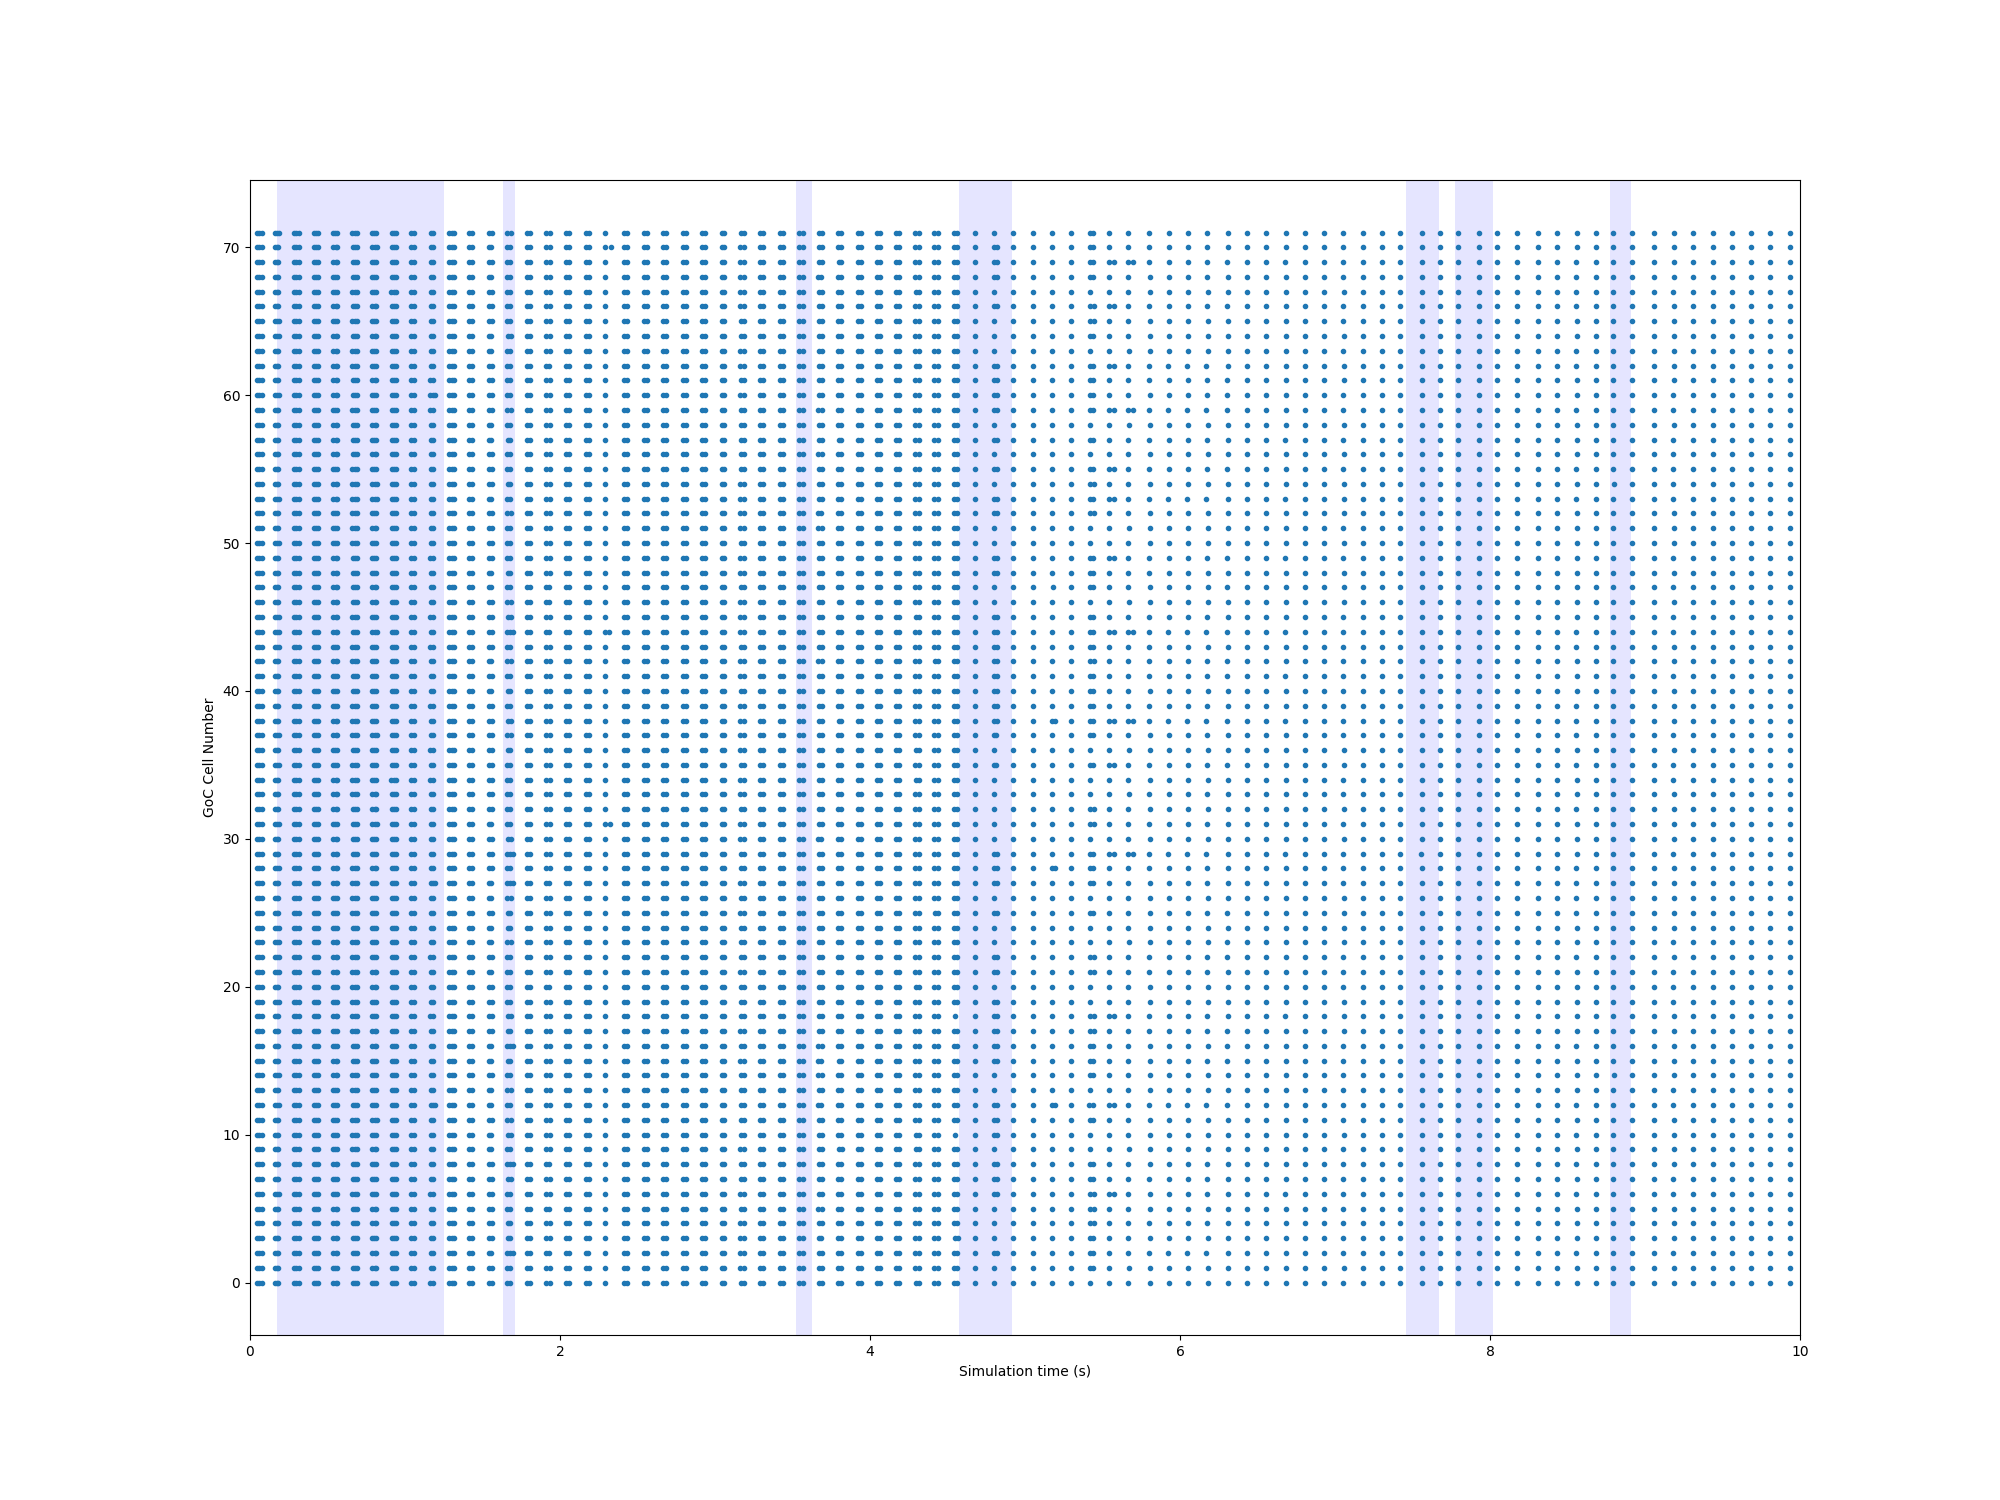

In [20]:
init_time = 0.0
end_time = 10.0
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
if index[0]!=0:
    index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)
plt.savefig('raster_plot_1_AT.eps', format='eps', dpi=1000)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

In [11]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Average spike per oscillatory cycle: 0.0052812499999999995 Hz


Text(0.5,98.1281,u'Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

<IPython.core.display.Javascript object>


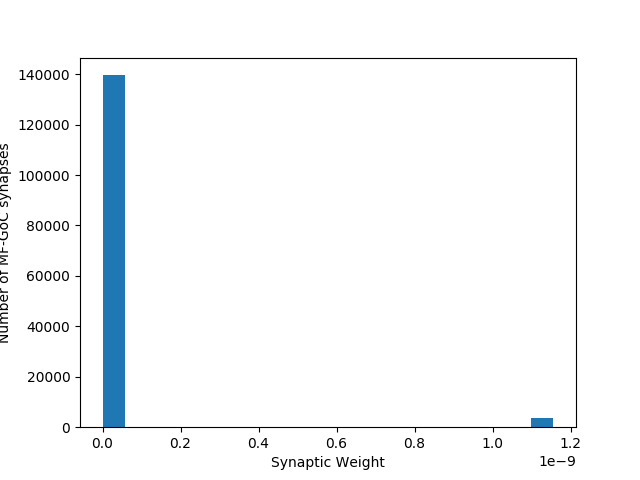

<IPython.core.display.Javascript object>


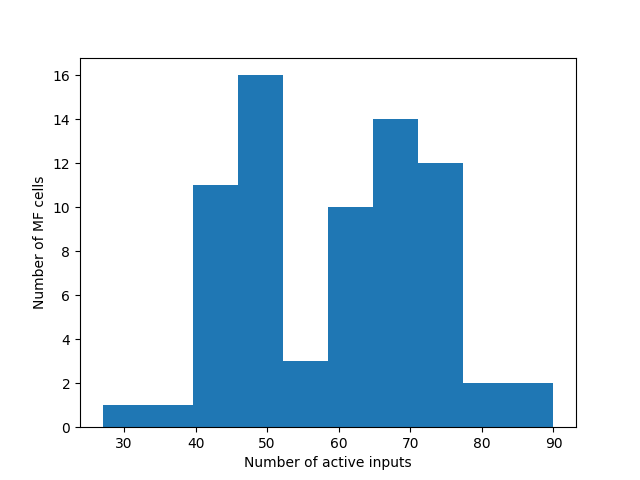

Number of active synapses MF-GoC: 4273


<IPython.core.display.Javascript object>


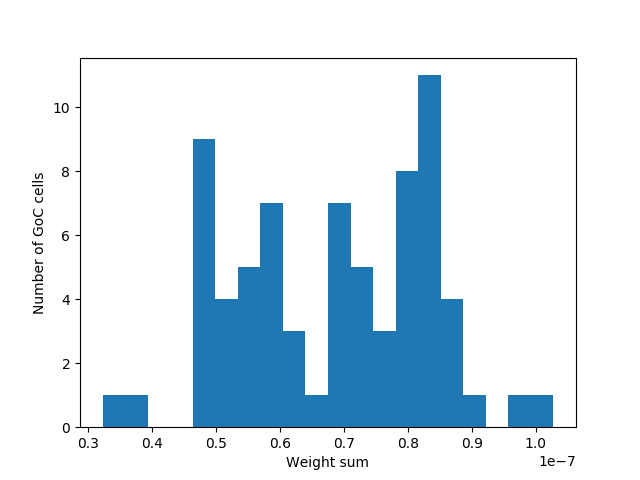

Weight sum histogram MF-GoC: 4273


In [12]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,simulation.config_options['mfgocsynapsis']['max_weight']))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

<IPython.core.display.Javascript object>


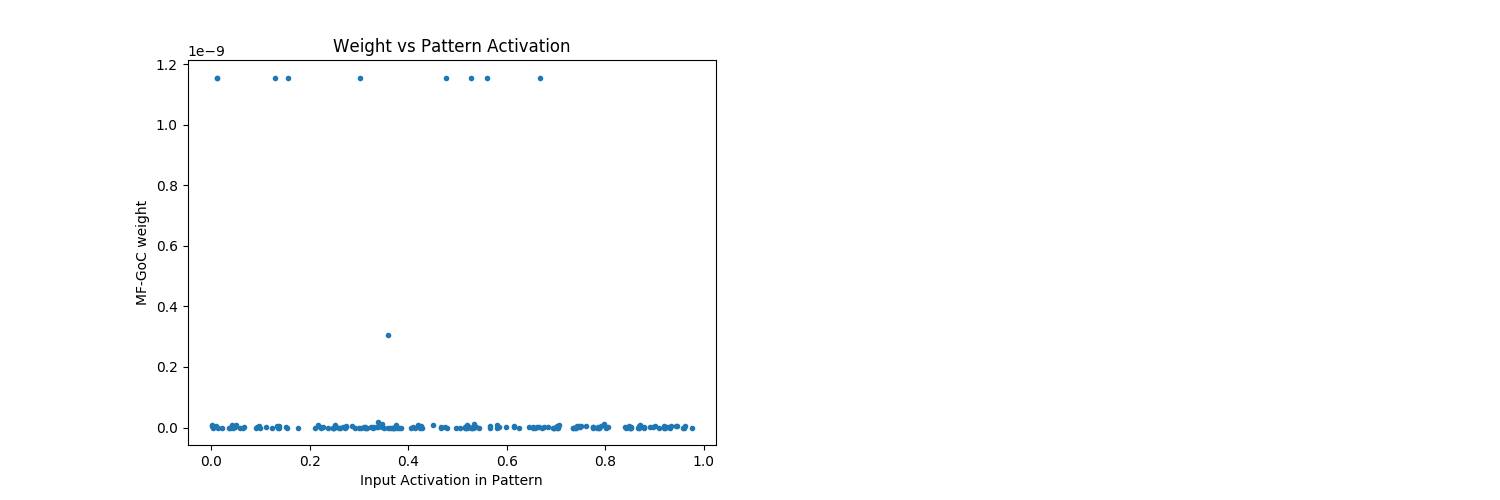

Text(0.5,1,u'Weight vs Pattern Activation')

In [13]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index==3
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

<IPython.core.display.Javascript object>


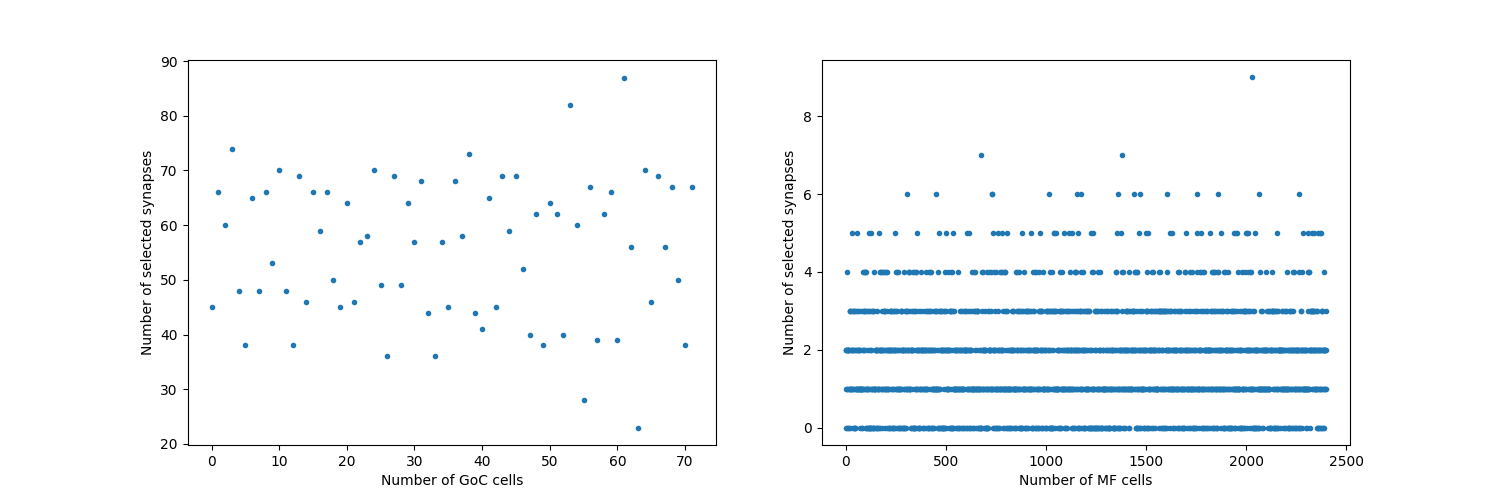

Text(0.5,0,u'Number of MF cells')

In [14]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [15]:
simulation.analyze_av_MI()

2018-09-10 11:17:57,334 - P32443 - MemTotal:2206M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-09-10 11:17:57,354 - P32443 - MemTotal:2206M - Simulation - INFO: Analyzing mutual information from time 2600.0 to 2900.0 seconds
2018-09-10 11:17:57,359 - P32443 - MemTotal:2206M - Simulation - INFO: Average firing rate in MI analysis: 1.86Hz
2018-09-10 11:17:57,413 - P32443 - MemTotal:2206M - Simulation - INFO: Individual pattern hit matrix:
2018-09-10 11:17:57,415 - P32443 - MemTotal:2206M - Simulation - INFO: [[0.90552585 0.90909091 0.91087344 0.90730838 0.90552585 0.90909091
  0.90909091 0.91087344 0.9144385  0.90730838 0.9144385  0.90909091
  0.90374332 0.89304813 0.90909091 0.90909091 0.90374332 0.90552585
  0.90909091 0.91087344 0.90552585 0.91622103 0.90374332 0.90552585
  0.9144385  0.90730838 0.90552585 0.89661319 0.91265597 0.90909091
  0.91087344 0.91087344 0.9144385  0.90374332 0.90909091 0.90552585
  0.90552585 0.898

[array([0.69214534])]

In [16]:
simulation.analyze_Hits_Top()

2018-09-10 11:17:57,467 - P32443 - MemTotal:2206M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-09-10 11:17:57,500 - P32443 - MemTotal:2206M - Simulation - INFO: Average firing rate in MI analysis: 1.86Hz
2018-09-10 11:17:57,562 - P32443 - MemTotal:2206M - Simulation - INFO: Individual pattern hit matrix:
2018-09-10 11:17:57,563 - P32443 - MemTotal:2206M - Simulation - INFO: [[0.90552585 0.90909091 0.91087344 0.90730838 0.90552585 0.90909091
  0.90909091 0.91087344 0.9144385  0.90730838 0.9144385  0.90909091
  0.90374332 0.89304813 0.90909091 0.90909091 0.90374332 0.90552585
  0.90909091 0.91087344 0.90552585 0.91622103 0.90374332 0.90552585
  0.9144385  0.90730838 0.90552585 0.89661319 0.91265597 0.90909091
  0.91087344 0.91087344 0.9144385  0.90374332 0.90909091 0.90552585
  0.90552585 0.89839572 0.90909091 0.90909091 0.90909091 0.89839572
  0.91087344 0.90909091 0.9144385  0.90730838 0.90196078 0.90730838
  0.91087344 0.90909091 0.90730838 0.89839572 0

[0.8802601552097761]